In [1]:
cd /content/drive/MyDrive/Neo_Exophyre

/content/drive/MyDrive/Neo_Exophyre


In [3]:
import pathlib
import sqlite3

In [5]:
# Accessing the NEO database
database_dir = pathlib.Path("./databases/neos/")
database_file = pathlib.Path("neodys.db")
database_filepath = database_dir / database_file

# Establish a connection to the database and set a cursor
neodys_db_con = sqlite3.connect(database_filepath)
neodys_db_cur = neodys_db_con.cursor()

In [6]:
import pandas as pd

# Get all information from the DB. Since the DB is rather small, this won't cause any issues!
neo_df = pd.read_sql("SELECT * FROM main", neodys_db_con)

# Close the database.
neodys_db_con.close()

In [8]:
neo_df.head(5)

,Name,Epoch_MJD,SemMajAxis_AU,Ecc_,Incl_deg,LongAscNode_deg,ArgP_deg,MeanAnom_deg,AbsMag_,SlopeParamG_,Aphel_AU,Perihel_AU,NEOClass
0,433,60000.0,1.458129,0.222782,10.827822,304.287024,178.926986,110.777664,10.91,0.46,1.782974,1.133284,Amor
1,719,60600.0,2.636157,0.546780,11.575260,183.857164,156.215519,148.450677,15.54,0.15,4.077554,1.194760,Amor
2,887,60600.0,2.472525,0.571093,9.398799,110.423003,350.474252,340.198429,13.43,-0.12,3.884567,1.060483,Amor
3,1036,60600.0,2.665299,0.532826,26.686736,215.494967,132.496155,6.984966,9.47,0.30,4.085439,1.245159,Amor
4,1221,60600.0,1.920154,0.434718,11.868483,171.260813,26.717610,271.700798,17.43,0.15,2.754880,1.085428,Amor


In [9]:
new_neo_df = neo_df.drop('Name',axis=1)
new_neo_df.head(5)

,Epoch_MJD,SemMajAxis_AU,Ecc_,Incl_deg,LongAscNode_deg,ArgP_deg,MeanAnom_deg,AbsMag_,SlopeParamG_,Aphel_AU,Perihel_AU,NEOClass
0,60000.0,1.458129,0.222782,10.827822,304.287024,178.926986,110.777664,10.91,0.46,1.782974,1.133284,Amor
1,60600.0,2.636157,0.546780,11.575260,183.857164,156.215519,148.450677,15.54,0.15,4.077554,1.194760,Amor
2,60600.0,2.472525,0.571093,9.398799,110.423003,350.474252,340.198429,13.43,-0.12,3.884567,1.060483,Amor
3,60600.0,2.665299,0.532826,26.686736,215.494967,132.496155,6.984966,9.47,0.30,4.085439,1.245159,Amor
4,60600.0,1.920154,0.434718,11.868483,171.260813,26.717610,271.700798,17.43,0.15,2.754880,1.085428,Amor


In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [14]:
# Encode target variable
label_encoder = LabelEncoder()
new_neo_df['NEOClass_encoded'] = label_encoder.fit_transform(new_neo_df['NEOClass'])

In [16]:
# 🎯 Separate features and target
X = new_neo_df.drop(columns=['NEOClass', 'NEOClass_encoded'])
y = new_neo_df['NEOClass_encoded']

In [17]:
# ⚖️ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# 🔀 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# 🧠 Neural Network Model
import numpy as np

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,469 (181.52 KB)

 Trainable params: 46,469 (181.52 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 🛠️ Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
#Model training
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)


Epoch 1/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8602 - loss: 0.3756
Epoch 2/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9634 - loss: 0.1008
Epoch 3/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9675 - loss: 0.0814
Epoch 4/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9711 - loss: 0.0706
Epoch 5/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9751 - loss: 0.0628
Epoch 6/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9779 - loss: 0.0638
Epoch 7/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9807 - loss: 0.0555
Epoch 8/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9786 - loss: 0.0560
Epoch 9/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9802 - loss: 0.0553
Epoch 10/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9819 - loss: 0.0484
Epoch 11/100
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9823 - loss: 0.0454
Epoch 12/100


In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 99.21%


In [26]:
import seaborn as sns

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred = model.predict(X_test)

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


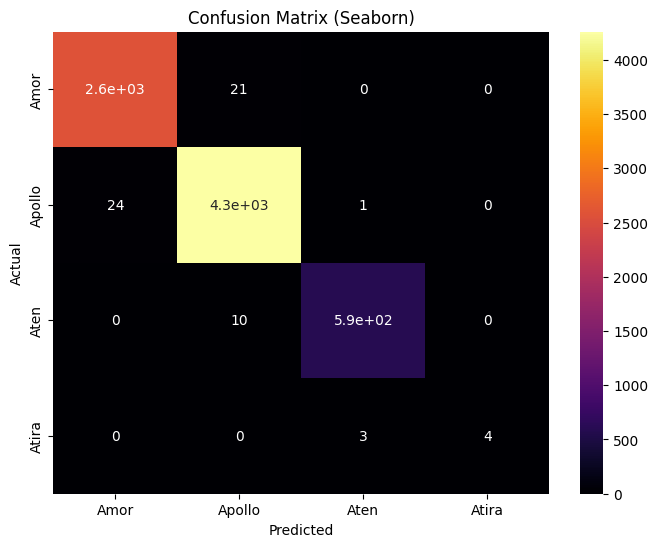

In [37]:
import matplotlib.pyplot as plt


# 🔍 Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 🧮 Confusion Matrix
labels = np.unique(np.concatenate((y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=labels)

# 🖼️ Plot using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='inferno',
            xticklabels=label_encoder.inverse_transform(labels),
            yticklabels=label_encoder.inverse_transform(labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Seaborn)')
plt.show()


